# Pre processamento dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/UniversalBank (1).csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Visualizar dados

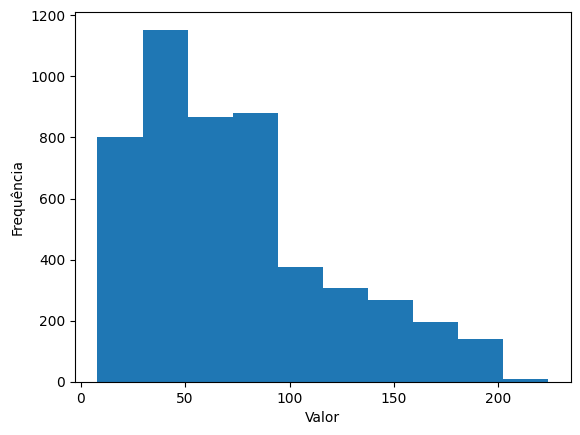

In [9]:
plt.hist(df['Income']);
plt.xlabel("Valor")
plt.ylabel("Frequência");

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'ZIP Code'}>,
        <Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>,
        <Axes: title={'center': 'CD Account'}>],
       [<Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>, <Axes: >, <Axes: >]],
      dtype=object)

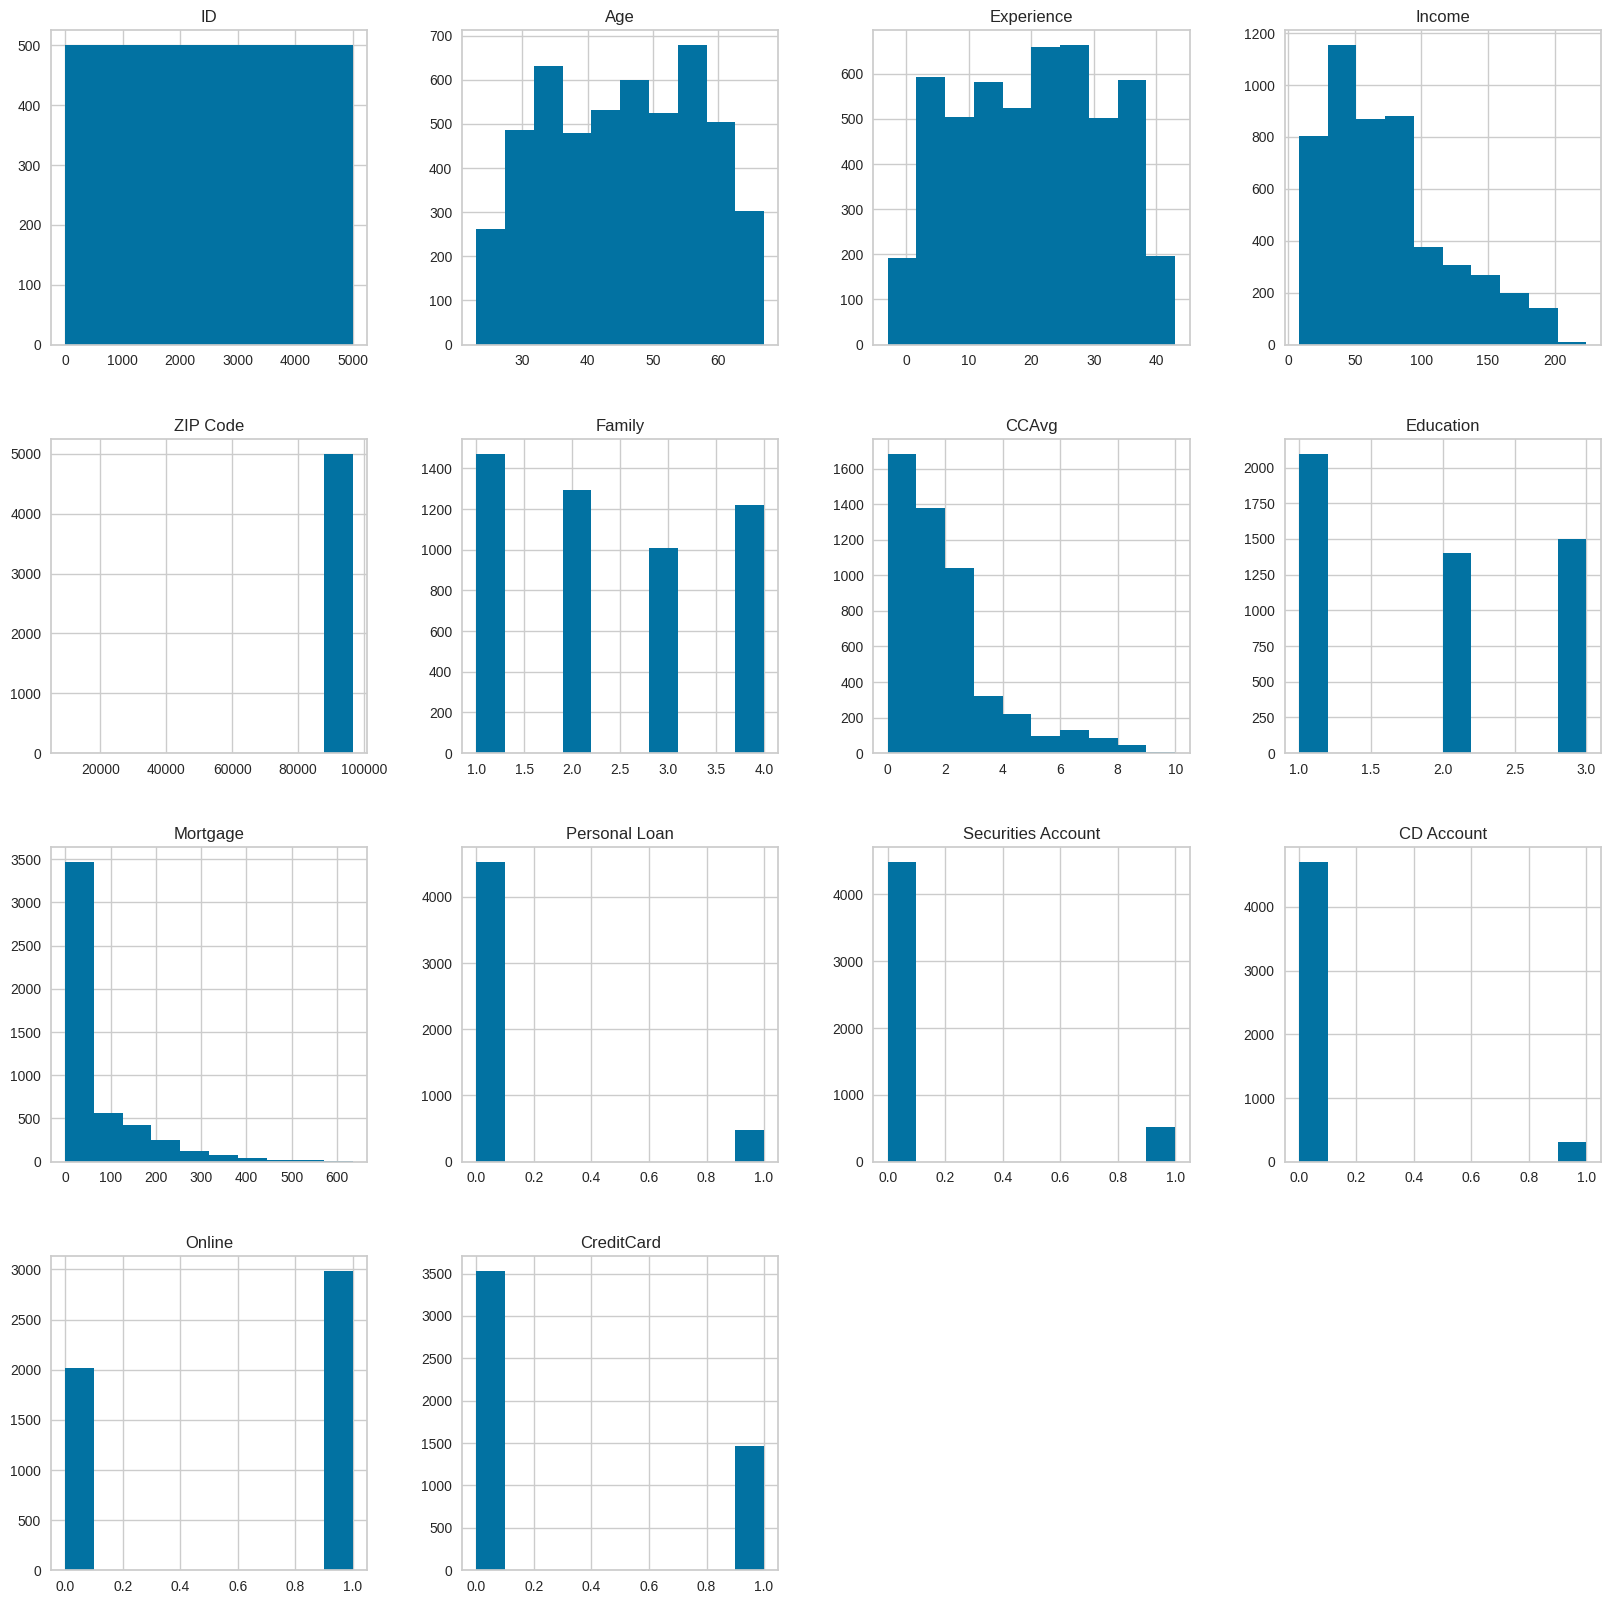

In [39]:
df.hist(figsize=(20,20))

# Divisao previsores e classe

In [3]:
X_bank = df.iloc[:, 1:12].values

In [4]:
y_bank = df.iloc[:, 13].values

In [12]:
type(X_bank)

numpy.ndarray

In [13]:
type(y_bank)

numpy.ndarray

In [14]:
X_bank

array([[25.,  1., 49., ...,  0.,  1.,  0.],
       [45., 19., 34., ...,  0.,  1.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  0.,  0.],
       [28.,  4., 83., ...,  0.,  0.,  0.]])

In [15]:
y_bank

array([0, 0, 0, ..., 0, 0, 1])

# Divisao treino e teste

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_bank_treinamento, X_bank_teste, y_bank_treinamento, y_bank_teste = train_test_split(X_bank, y_bank, test_size = 0.25, random_state = 0)

# SVM

In [7]:
from sklearn.svm import SVC

In [8]:
X_bank_treinamento.shape, y_bank_treinamento.shape

((3750, 11), (3750,))

In [9]:
X_bank_teste.shape, y_bank_teste.shape

((1250, 11), (1250,))

In [35]:
# metricas e treinamento
svm_bank = SVC(kernel='rbf', random_state=1, C=2.0)
svm_bank.fit(X_bank_treinamento, y_bank_treinamento)

SVC(C=2.0, random_state=1)

In [36]:
previsoes = svm_bank.predict(X_bank_teste)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
y_bank_teste

array([0, 0, 1, ..., 0, 1, 0])

In [38]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_bank_teste, previsoes)

0.7008

0.7008

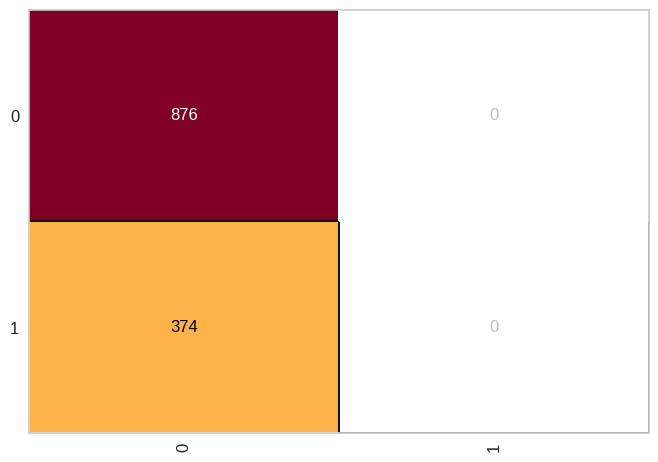

In [14]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_bank)
cm.fit(X_bank_treinamento, y_bank_treinamento)
cm.score(X_bank_teste, y_bank_teste)

In [15]:
print(classification_report(y_bank_teste, previsoes))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       876
           1       0.00      0.00      0.00       374

    accuracy                           0.70      1250
   macro avg       0.35      0.50      0.41      1250
weighted avg       0.49      0.70      0.58      1250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


consideração: o algoritmo pode ter tido um resultado baixo por ter pouco volume de dados e ser geralmente usado para problemas mais complexos